In [1]:
import numpy as np

class FullyConnectedLayer:
    def __init__(self, input_size, output_size, initializer, optimizer):
        """
        Constructor for the FullyConnectedLayer class.
        
        Parameters:
        - input_size (int): The size of the input to the layer.
        - output_size (int): The size of the output from the layer.
        - initializer: Instance of a weight initialization class.
        - optimizer: Instance of an optimization method class.
        """
        # Initialize weights and biases
        self.W = initializer.initialize((input_size, output_size))  # Weight matrix
        self.B = initializer.initialize((1, output_size))          # Biases
        
        # Save the optimizer instance
        self.optimizer = optimizer

        # Variables to store inputs and gradients for backpropagation
        self.X = None  # Input data
        self.dW = None # Gradient for weights
        self.dB = None # Gradient for biases
    
    def forward(self, X):
        """
        Perform the forward pass through the layer.
        
        Parameters:
        - X (numpy.ndarray): Input to the layer, of shape (batch_size, input_size).
        
        Returns:
        - Output of the layer, of shape (batch_size, output_size).
        """
        self.X = X  # Store input for backward pass
        return np.dot(X, self.W) + self.B  # Linear transformation
    
    def backward(self, dY):
        """
        Perform the backward pass through the layer.
        
        Parameters:
        - dY (numpy.ndarray): Gradient of the loss with respect to the output, 
          of shape (batch_size, output_size).
        
        Returns:
        - dX (numpy.ndarray): Gradient of the loss with respect to the input, 
          of shape (batch_size, input_size).
        """
        # Compute gradients for weights and biases
        self.dW = np.dot(self.X.T, dY)  # Gradient of weights
        self.dB = np.sum(dY, axis=0, keepdims=True)  # Gradient of biases

        # Compute gradient for the input (for propagation to earlier layers)
        dX = np.dot(dY, self.W.T)
        
        # Update weights and biases using the optimizer
        self.optimizer.update(self)
        
        return dX


In [2]:
class Initializer:
    def initialize(self, shape):
        # Example: Xavier/Glorot initialization
        return np.random.randn(*shape) * np.sqrt(2 / sum(shape))


In [3]:
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
    
    def update(self, layer):
        # Update weights and biases
        layer.W -= self.learning_rate * layer.dW
        layer.B -= self.learning_rate * layer.dB


In [4]:
# Create instances of the initializer and optimizer
initializer = Initializer()
optimizer = SGD(learning_rate=0.01)

# Create a fully connected layer
fc_layer = FullyConnectedLayer(input_size=4, output_size=3, initializer=initializer, optimizer=optimizer)

# Perform forward pass
X = np.random.rand(5, 4)  # Example input with batch_size=5, input_size=4
output = fc_layer.forward(X)
print("Forward Output:", output)

# Perform backward pass
dY = np.random.rand(5, 3)  # Example gradient from the next layer
grad_input = fc_layer.backward(dY)
print("Gradient Input:", grad_input)


Forward Output: [[-0.42665373 -0.39870235 -0.67526294]
 [-0.53398361  0.05923895 -0.73042137]
 [-0.01678972 -0.37778002 -1.17405806]
 [-0.31082859  0.24465106 -0.24983533]
 [-0.2640523  -0.17558532 -0.89977182]]
Gradient Input: [[ 0.02208399  0.39782356 -0.30132513 -0.26939947]
 [-0.25548192  0.06477422 -0.12605292 -0.85485563]
 [-0.02180358  0.40603272 -0.41200395 -0.48534439]
 [-0.21842685 -0.09020194  0.10674821 -0.5271222 ]
 [ 0.02846066  0.51665086 -0.42660745 -0.37816668]]


In [6]:
import numpy as np

class SimpleInitializer:
    def __init__(self, sigma=0.01):
        """
        Constructor for the SimpleInitializer class.
        
        Parameters:
        - sigma (float): Standard deviation for initializing weights and biases.
        """
        self.sigma = sigma

    def initialize(self, shape):
        """
        Initialize weights or biases with a normal distribution.
        
        Parameters:
        - shape (tuple): Shape of the array to be initialized.
        
        Returns:
        - numpy.ndarray: Initialized array.
        """
        return np.random.randn(*shape) * self.sigma


class FullyConnectedLayer:
    def __init__(self, input_size, output_size, initializer, optimizer):
        """
        Constructor for the FullyConnectedLayer class.
        
        Parameters:
        - input_size (int): The size of the input to the layer.
        - output_size (int): The size of the output from the layer.
        - initializer: Instance of the initialization class (e.g., SimpleInitializer).
        - optimizer: Instance of the optimization method class.
        """
        # Initialize weights and biases using the provided initializer
        self.W = initializer.initialize((input_size, output_size))  # Weight matrix
        self.B = initializer.initialize((1, output_size))          # Biases
        
        # Save the optimizer instance
        self.optimizer = optimizer

        # Variables to store inputs and gradients for backpropagation
        self.X = None  # Input data
        self.dW = None # Gradient for weights
        self.dB = None # Gradient for biases
    
    def forward(self, X):
        """
        Perform the forward pass through the layer.
        
        Parameters:
        - X (numpy.ndarray): Input to the layer, of shape (batch_size, input_size).
        
        Returns:
        - Output of the layer, of shape (batch_size, output_size).
        """
        self.X = X  # Store input for backward pass
        return np.dot(X, self.W) + self.B  # Linear transformation
    
    def backward(self, dY):
        """
        Perform the backward pass through the layer.
        
        Parameters:
        - dY (numpy.ndarray): Gradient of the loss with respect to the output, 
          of shape (batch_size, output_size).
        
        Returns:
        - dX (numpy.ndarray): Gradient of the loss with respect to the input, 
          of shape (batch_size, input_size).
        """
        # Compute gradients for weights and biases
        self.dW = np.dot(self.X.T, dY)  # Gradient of weights
        self.dB = np.sum(dY, axis=0, keepdims=True)  # Gradient of biases

        # Compute gradient for the input (for propagation to earlier layers)
        dX = np.dot(dY, self.W.T)
        
        # Update weights and biases using the optimizer
        self.optimizer.update(self)
        
        return dX


In [7]:
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
    
    def update(self, layer):
        # Update weights and biases
        layer.W -= self.learning_rate * layer.dW
        layer.B -= self.learning_rate * layer.dB


# Create instances of the initializer and optimizer
initializer = SimpleInitializer(sigma=0.1)
optimizer = SGD(learning_rate=0.01)

# Create a fully connected layer
fc_layer = FullyConnectedLayer(input_size=4, output_size=3, initializer=initializer, optimizer=optimizer)

# Perform forward pass
X = np.random.rand(5, 4)  # Example input with batch_size=5, input_size=4
output = fc_layer.forward(X)
print("Forward Output:\n", output)

# Perform backward pass
dY = np.random.rand(5, 3)  # Example gradient from the next layer
grad_input = fc_layer.backward(dY)
print("Gradient Input:\n", grad_input)


Forward Output:
 [[ 0.05412712 -0.00554765  0.02775918]
 [ 0.03946052 -0.07849734 -0.04296552]
 [ 0.10248481 -0.05831439 -0.07313973]
 [ 0.09435305  0.01470969  0.02149186]
 [ 0.0672845  -0.05236816 -0.04318388]]
Gradient Input:
 [[-0.02995465  0.08489923  0.03508099 -0.13184909]
 [-0.01769098  0.0762486   0.0267606  -0.1236728 ]
 [ 0.03560946  0.10126048  0.11369913 -0.02493133]
 [-0.01566642  0.03166856  0.0035139  -0.06555549]
 [-0.0157688   0.05562916  0.00934809 -0.10715724]]


In [8]:
import numpy as np

class SGD:
    def __init__(self, learning_rate=0.01):
        """
        Constructor for the SGD optimizer class.
        
        Parameters:
        - learning_rate (float): Learning rate for gradient descent.
        """
        self.learning_rate = learning_rate

    def update(self, layer):
        """
        Update the weights and biases of the given layer using SGD.
        
        Parameters:
        - layer (FullyConnectedLayer): The layer whose parameters will be updated.
        """
        # Update weights and biases using the computed gradients
        layer.W -= self.learning_rate * layer.dW
        layer.B -= self.learning_rate * layer.dB


class FullyConnectedLayer:
    def __init__(self, input_size, output_size, initializer, optimizer):
        """
        Constructor for the FullyConnectedLayer class.
        
        Parameters:
        - input_size (int): The size of the input to the layer.
        - output_size (int): The size of the output from the layer.
        - initializer: Instance of the initialization class (e.g., SimpleInitializer).
        - optimizer: Instance of the optimization method class (e.g., SGD).
        """
        # Initialize weights and biases using the provided initializer
        self.W = initializer.initialize((input_size, output_size))  # Weight matrix
        self.B = initializer.initialize((1, output_size))          # Biases
        
        # Save the optimizer instance
        self.optimizer = optimizer

        # Variables to store inputs and gradients for backpropagation
        self.X = None  # Input data
        self.dW = None # Gradient for weights
        self.dB = None # Gradient for biases
    
    def forward(self, X):
        """
        Perform the forward pass through the layer.
        
        Parameters:
        - X (numpy.ndarray): Input to the layer, of shape (batch_size, input_size).
        
        Returns:
        - Output of the layer, of shape (batch_size, output_size).
        """
        self.X = X  # Store input for backward pass
        return np.dot(X, self.W) + self.B  # Linear transformation
    
    def backward(self, dY):
        """
        Perform the backward pass through the layer.
        
        Parameters:
        - dY (numpy.ndarray): Gradient of the loss with respect to the output, 
          of shape (batch_size, output_size).
        
        Returns:
        - dX (numpy.ndarray): Gradient of the loss with respect to the input, 
          of shape (batch_size, input_size).
        """
        # Compute gradients for weights and biases
        self.dW = np.dot(self.X.T, dY)  # Gradient of weights
        self.dB = np.sum(dY, axis=0, keepdims=True)  # Gradient of biases

        # Compute gradient for the input (for propagation to earlier layers)
        dX = np.dot(dY, self.W.T)
        
        # Update weights and biases using the optimizer
        self.optimizer.update(self)
        
        return dX


In [9]:
# Define an initializer
class SimpleInitializer:
    def __init__(self, sigma=0.01):
        self.sigma = sigma

    def initialize(self, shape):
        return np.random.randn(*shape) * self.sigma


# Create instances of the initializer and optimizer
initializer = SimpleInitializer(sigma=0.1)
optimizer = SGD(learning_rate=0.01)

# Create a fully connected layer
fc_layer = FullyConnectedLayer(input_size=4, output_size=3, initializer=initializer, optimizer=optimizer)

# Perform forward pass
X = np.random.rand(5, 4)  # Example input with batch_size=5, input_size=4
output = fc_layer.forward(X)
print("Forward Output:\n", output)

# Perform backward pass
dY = np.random.rand(5, 3)  # Example gradient from the next layer
grad_input = fc_layer.backward(dY)
print("Gradient Input:\n", grad_input)


Forward Output:
 [[ 0.08599222  0.18257907 -0.0156909 ]
 [ 0.08510483  0.07190332  0.01612486]
 [-0.02717506 -0.02700944  0.05409878]
 [-0.00112033  0.02751845  0.05442566]
 [ 0.00376513 -0.00527917  0.13977493]]
Gradient Input:
 [[ 0.03916811 -0.02896058 -0.10501562 -0.05243317]
 [ 0.06770587 -0.00338589 -0.12000314 -0.13286546]
 [ 0.10997139  0.13648482 -0.09795272 -0.28434363]
 [ 0.10821447  0.05064348 -0.08598406 -0.28428584]
 [ 0.12422543  0.03028878 -0.13200677 -0.30341606]]


In [10]:
class Adam:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.mW = None
        self.vW = None
        self.mB = None
        self.vB = None
        self.t = 0

    def update(self, layer):
        if self.mW is None:
            # Initialize moment estimates to zero
            self.mW = np.zeros_like(layer.W)
            self.vW = np.zeros_like(layer.W)
            self.mB = np.zeros_like(layer.B)
            self.vB = np.zeros_like(layer.B)
        
        # Increment time step
        self.t += 1

        # Update biased first and second moment estimates
        self.mW = self.beta1 * self.mW + (1 - self.beta1) * layer.dW
        self.vW = self.beta2 * self.vW + (1 - self.beta2) * (layer.dW ** 2)
        self.mB = self.beta1 * self.mB + (1 - self.beta1) * layer.dB
        self.vB = self.beta2 * self.vB + (1 - self.beta2) * (layer.dB ** 2)

        # Correct bias in moments
        mW_hat = self.mW / (1 - self.beta1 ** self.t)
        vW_hat = self.vW / (1 - self.beta2 ** self.t)
        mB_hat = self.mB / (1 - self.beta1 ** self.t)
        vB_hat = self.vB / (1 - self.beta2 ** self.t)

        # Update weights and biases
        layer.W -= self.learning_rate * mW_hat / (np.sqrt(vW_hat) + self.epsilon)
        layer.B -= self.learning_rate * mB_hat / (np.sqrt(vB_hat) + self.epsilon)


In [11]:
import numpy as np

class ReLU:
    def forward(self, X):
        """
        Forward pass for ReLU activation.
        
        Parameters:
        - X (numpy.ndarray): Input array.
        
        Returns:
        - numpy.ndarray: Output after applying ReLU.
        """
        self.X = X  # Store input for backward pass
        return np.maximum(0, X)

    def backward(self, dY):
        """
        Backward pass for ReLU activation.
        
        Parameters:
        - dY (numpy.ndarray): Gradient of loss with respect to the output of ReLU.
        
        Returns:
        - numpy.ndarray: Gradient of loss with respect to the input of ReLU.
        """
        return dY * (self.X > 0)  # Derivative of ReLU


class Sigmoid:
    def forward(self, X):
        """
        Forward pass for Sigmoid activation.
        
        Parameters:
        - X (numpy.ndarray): Input array.
        
        Returns:
        - numpy.ndarray: Output after applying Sigmoid.
        """
        self.output = 1 / (1 + np.exp(-X))
        return self.output

    def backward(self, dY):
        """
        Backward pass for Sigmoid activation.
        
        Parameters:
        - dY (numpy.ndarray): Gradient of loss with respect to the output of Sigmoid.
        
        Returns:
        - numpy.ndarray: Gradient of loss with respect to the input of Sigmoid.
        """
        return dY * self.output * (1 - self.output)  # Derivative of Sigmoid


class Tanh:
    def forward(self, X):
        """
        Forward pass for Tanh activation.
        
        Parameters:
        - X (numpy.ndarray): Input array.
        
        Returns:
        - numpy.ndarray: Output after applying Tanh.
        """
        self.output = np.tanh(X)
        return self.output

    def backward(self, dY):
        """
        Backward pass for Tanh activation.
        
        Parameters:
        - dY (numpy.ndarray): Gradient of loss with respect to the output of Tanh.
        
        Returns:
        - numpy.ndarray: Gradient of loss with respect to the input of Tanh.
        """
        return dY * (1 - self.output ** 2)  # Derivative of Tanh


class SoftmaxWithCrossEntropy:
    def forward(self, X, y):
        """
        Forward pass for Softmax activation combined with cross-entropy loss.
        
        Parameters:
        - X (numpy.ndarray): Input array (logits), shape (batch_size, num_classes).
        - y (numpy.ndarray): One-hot encoded labels, shape (batch_size, num_classes).
        
        Returns:
        - float: Cross-entropy loss.
        """
        # Compute softmax
        X_exp = np.exp(X - np.max(X, axis=1, keepdims=True))  # Stability adjustment
        self.probs = X_exp / np.sum(X_exp, axis=1, keepdims=True)
        
        # Compute cross-entropy loss
        self.y = y
        batch_size = X.shape[0]
        self.loss = -np.sum(y * np.log(self.probs + 1e-12)) / batch_size  # Add epsilon to avoid log(0)
        return self.loss

    def backward(self):
        """
        Backward pass for Softmax activation combined with cross-entropy loss.
        
        Returns:
        - numpy.ndarray: Gradient of loss with respect to the input logits.
        """
        batch_size = self.y.shape[0]
        return (self.probs - self.y) / batch_size  # Gradient of loss w.r.t. logits


In [12]:
# Example input data and labels
X = np.array([[2.0, 1.0, 0.1],
              [0.5, 2.5, 0.3]])
y = np.array([[1, 0, 0],
              [0, 1, 0]])  # One-hot encoded labels

# Softmax with Cross-Entropy
softmax_ce = SoftmaxWithCrossEntropy()

# Forward pass
loss = softmax_ce.forward(X, y)
print("Cross-Entropy Loss:", loss)

# Backward pass
dX = softmax_ce.backward()
print("Gradient w.r.t. Input:\n", dX)


Cross-Entropy Loss: 0.31853976964780395
Gradient w.r.t. Input:
 [[-0.17049943  0.12121649  0.04928295]
 [ 0.05430187 -0.09876047  0.04445861]]


In [13]:
# Example: Fully connected layer with ReLU activation
fc_layer = FullyConnectedLayer(input_size=4, output_size=3, initializer=initializer, optimizer=optimizer)
relu = ReLU()

# Forward pass
X = np.random.rand(5, 4)
fc_output = fc_layer.forward(X)
relu_output = relu.forward(fc_output)

# Backward pass
dY = np.random.rand(5, 3)  # Example gradient
relu_grad = relu.backward(dY)
fc_grad = fc_layer.backward(relu_grad)


In [14]:
import numpy as np

class ReLU:
    def forward(self, X):
        """
        Forward pass for the ReLU activation function.
        
        Parameters:
        - X (numpy.ndarray): Input array (features).
        
        Returns:
        - numpy.ndarray: Output after applying ReLU.
        """
        self.X = X  # Store input for use in backward pass
        return np.maximum(0, X)

    def backward(self, dY):
        """
        Backward pass for the ReLU activation function.
        
        Parameters:
        - dY (numpy.ndarray): Gradient of the loss with respect to the output of ReLU.
        
        Returns:
        - numpy.ndarray: Gradient of the loss with respect to the input of ReLU.
        """
        dX = dY * (self.X > 0)  # Gradient is 1 if input > 0, otherwise 0
        return dX


In [15]:
# Example input array
X = np.array([[-1.0, 2.0, -0.5], 
              [3.0, -0.1, 0.0]])

# Instantiate the ReLU class
relu = ReLU()

# Forward pass
forward_output = relu.forward(X)
print("Forward Output:\n", forward_output)

# Example gradient from the next layer
dY = np.array([[1.0, 2.0, 3.0], 
               [0.1, 0.2, 0.3]])

# Backward pass
backward_output = relu.backward(dY)
print("Backward Output (Gradient):\n", backward_output)


Forward Output:
 [[0. 2. 0.]
 [3. 0. 0.]]
Backward Output (Gradient):
 [[0.  2.  0. ]
 [0.1 0.  0. ]]


In [16]:
# Example pipeline with FullyConnectedLayer and ReLU
fc_layer = FullyConnectedLayer(input_size=4, output_size=3, initializer=initializer, optimizer=optimizer)
relu = ReLU()

# Forward pass
X = np.random.rand(5, 4)  # Example input
fc_output = fc_layer.forward(X)
relu_output = relu.forward(fc_output)

# Backward pass
dY = np.random.rand(5, 3)  # Example gradient
relu_grad = relu.backward(dY)
fc_grad = fc_layer.backward(relu_grad)


In [17]:
import numpy as np

class XavierInitializer:
    def __init__(self):
        pass

    def initialize(self, input_size, output_size):
        """
        Initialize weights and biases using Xavier initialization.
        
        Parameters:
        - input_size (int): Number of nodes in the previous layer.
        - output_size (int): Number of nodes in the current layer.
        
        Returns:
        - W (numpy.ndarray): Weight matrix initialized with Xavier method.
        - B (numpy.ndarray): Bias vector initialized with zeros.
        """
        sigma = 1.0 / np.sqrt(input_size)
        W = np.random.normal(0, sigma, (input_size, output_size))
        B = np.zeros(output_size)
        return W, B


In [18]:
class HeInitializer:
    def __init__(self):
        pass

    def initialize(self, input_size, output_size):
        """
        Initialize weights and biases using He initialization.
        
        Parameters:
        - input_size (int): Number of nodes in the previous layer.
        - output_size (int): Number of nodes in the current layer.
        
        Returns:
        - W (numpy.ndarray): Weight matrix initialized with He method.
        - B (numpy.ndarray): Bias vector initialized with zeros.
        """
        sigma = np.sqrt(2.0 / input_size)
        W = np.random.normal(0, sigma, (input_size, output_size))
        B = np.zeros(output_size)
        return W, B


In [19]:
# Example: Xavier Initializer
xavier_init = XavierInitializer()
W_xavier, B_xavier = xavier_init.initialize(input_size=128, output_size=64)
print("Xavier Weights Shape:", W_xavier.shape)
print("Xavier Bias Shape:", B_xavier.shape)

# Example: He Initializer
he_init = HeInitializer()
W_he, B_he = he_init.initialize(input_size=128, output_size=64)
print("He Weights Shape:", W_he.shape)
print("He Bias Shape:", B_he.shape)


Xavier Weights Shape: (128, 64)
Xavier Bias Shape: (64,)
He Weights Shape: (128, 64)
He Bias Shape: (64,)


In [20]:
class FullyConnectedLayer:
    def __init__(self, input_size, output_size, initializer, optimizer):
        self.input_size = input_size
        self.output_size = output_size
        self.initializer = initializer
        self.optimizer = optimizer

        # Initialize weights and biases using the initializer
        self.W, self.B = self.initializer.initialize(input_size, output_size)

    def forward(self, X):
        self.X = X
        return np.dot(X, self.W) + self.B

    def backward(self, dY):
        dW = np.dot(self.X.T, dY)
        dB = np.sum(dY, axis=0)
        dX = np.dot(dY, self.W.T)

        # Update weights and biases using the optimizer
        self.W, self.B = self.optimizer.update(self, dW, dB)
        return dX


In [21]:
import numpy as np

class AdaGrad:
    def __init__(self, learning_rate=0.01, epsilon=1e-8):
        """
        Initializes the AdaGrad optimizer.

        Parameters:
        - learning_rate (float): Initial learning rate (alpha).
        - epsilon (float): Small value to avoid division by zero.
        """
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.H_W = None  # Accumulated squared gradients for weights
        self.H_B = None  # Accumulated squared gradients for biases

    def update(self, layer, dW, dB):
        """
        Updates the weights and biases of a layer using AdaGrad optimization.

        Parameters:
        - layer: The layer instance containing weights (W) and biases (B).
        - dW (numpy.ndarray): Gradient of loss with respect to weights.
        - dB (numpy.ndarray): Gradient of loss with respect to biases.

        Returns:
        - Updated weights (W) and biases (B).
        """
        # Initialize H_W and H_B if not already initialized
        if self.H_W is None:
            self.H_W = np.zeros_like(layer.W)
        if self.H_B is None:
            self.H_B = np.zeros_like(layer.B)

        # Update accumulated squared gradients
        self.H_W += dW**2
        self.H_B += dB**2

        # Update weights and biases
        layer.W -= self.learning_rate * dW / (np.sqrt(self.H_W) + self.epsilon)
        layer.B -= self.learning_rate * dB / (np.sqrt(self.H_B) + self.epsilon)

        return layer.W, layer.B


In [22]:
# Example Layer with Dummy Weights and Biases
class DummyLayer:
    def __init__(self, input_size, output_size):
        self.W = np.random.rand(input_size, output_size)
        self.B = np.random.rand(output_size)

# Create a Dummy Layer
layer = DummyLayer(input_size=128, output_size=64)

# Gradients (Example)
dW = np.random.rand(128, 64)
dB = np.random.rand(64)

# Instantiate AdaGrad Optimizer
adagrad = AdaGrad(learning_rate=0.01)

# Update Weights and Biases
updated_W, updated_B = adagrad.update(layer, dW, dB)

# Print Updated Parameters
print("Updated Weights Shape:", updated_W.shape)
print("Updated Biases Shape:", updated_B.shape)


Updated Weights Shape: (128, 64)
Updated Biases Shape: (64,)


In [23]:
class FullyConnectedLayer:
    def __init__(self, input_size, output_size, initializer, optimizer):
        self.input_size = input_size
        self.output_size = output_size
        self.initializer = initializer
        self.optimizer = optimizer

        # Initialize weights and biases
        self.W, self.B = self.initializer.initialize(input_size, output_size)

    def forward(self, X):
        self.X = X
        return np.dot(X, self.W) + self.B

    def backward(self, dY):
        dW = np.dot(self.X.T, dY)
        dB = np.sum(dY, axis=0)
        dX = np.dot(dY, self.W.T)

        # Update weights and biases using the optimizer
        self.W, self.B = self.optimizer.update(self, dW, dB)
        return dX


In [24]:
import numpy as np

class ScratchDeepNeuralNetworkClassifier:
    def __init__(self, epochs=10, batch_size=32, verbose=True):
        """
        Initializes the ScratchDeepNeuralNetworkClassifier.

        Parameters:
        - epochs (int): Number of training epochs.
        - batch_size (int): Size of each training batch.
        - verbose (bool): If True, prints training progress.
        """
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.layers = []  # List to store layers of the network

    def add(self, layer):
        """
        Adds a layer to the neural network.

        Parameters:
        - layer: Layer instance (e.g., FullyConnectedLayer, ActivationFunction).
        """
        self.layers.append(layer)

    def forward(self, X):
        """
        Performs a forward pass through the network.

        Parameters:
        - X (numpy.ndarray): Input data.

        Returns:
        - Output of the last layer (numpy.ndarray).
        """
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, y):
        """
        Performs a backward pass through the network.

        Parameters:
        - y (numpy.ndarray): True labels for the output.
        """
        grad = y
        for layer in reversed(self.layers):
            grad = layer.backward(grad)

    def fit(self, X_train, y_train):
        """
        Trains the neural network using the provided training data.

        Parameters:
        - X_train (numpy.ndarray): Training feature data.
        - y_train (numpy.ndarray): Training label data.
        """
        n_samples = X_train.shape[0]
        for epoch in range(self.epochs):
            perm = np.random.permutation(n_samples)  # Shuffle the data
            X_train = X_train[perm]
            y_train = y_train[perm]
            
            for i in range(0, n_samples, self.batch_size):
                # Create batches
                X_batch = X_train[i:i + self.batch_size]
                y_batch = y_train[i:i + self.batch_size]

                # Forward pass
                y_pred = self.forward(X_batch)

                # Compute gradient of loss
                grad = self.layers[-1].compute_gradient(y_batch)  # Softmax + CrossEntropy layer

                # Backward pass
                self.backward(grad)

            # Verbose: Print progress
            if self.verbose:
                loss = self._compute_loss(X_train, y_train)
                acc = self.score(X_train, y_train)
                print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

    def predict(self, X):
        """
        Predicts labels for the given input data.

        Parameters:
        - X (numpy.ndarray): Input data.

        Returns:
        - Predicted labels (numpy.ndarray).
        """
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

    def score(self, X, y):
        """
        Evaluates the accuracy of the model.

        Parameters:
        - X (numpy.ndarray): Input data.
        - y (numpy.ndarray): True labels.

        Returns:
        - Accuracy (float).
        """
        y_pred = self.predict(X)
        y_true = np.argmax(y, axis=1)
        return np.mean(y_pred == y_true)

    def _compute_loss(self, X, y):
        """
        Computes the loss for the given data.

        Parameters:
        - X (numpy.ndarray): Input data.
        - y (numpy.ndarray): True labels.

        Returns:
        - Loss value (float).
        """
        y_pred = self.forward(X)
        loss = -np.sum(y * np.log(y_pred + 1e-8)) / y.shape[0]
        return loss


In [26]:
class HeInitializer:
    def __init__(self):
        pass

    def initialize(self, input_size, output_size):
        """
        Initializes weights using He initialization.

        Parameters:
        - input_size (int): Number of input nodes.
        - output_size (int): Number of output nodes.

        Returns:
        - weights (numpy.ndarray): Initialized weights.
        - biases (numpy.ndarray): Initialized biases (set to zero).
        """
        stddev = np.sqrt(2.0 / input_size)
        weights = np.random.randn(input_size, output_size) * stddev
        biases = np.zeros(output_size)
        return weights, biases


In [27]:
class FullyConnectedLayer:
    def __init__(self, input_size, output_size, initializer, optimizer):
        """
        A fully connected (dense) layer.

        Parameters:
        - input_size (int): Number of input nodes.
        - output_size (int): Number of output nodes.
        - initializer: Instance of an initializer class.
        - optimizer: Instance of an optimizer class.
        """
        self.weights, self.biases = initializer.initialize(input_size, output_size)
        self.optimizer = optimizer
        self.input = None
        self.dW = None
        self.db = None

    def forward(self, X):
        """
        Performs the forward pass.

        Parameters:
        - X (numpy.ndarray): Input data.

        Returns:
        - Output of the layer (numpy.ndarray).
        """
        self.input = X
        return np.dot(X, self.weights) + self.biases

    def backward(self, dY):
        """
        Performs the backward pass.

        Parameters:
        - dY (numpy.ndarray): Gradient of the loss with respect to the output.

        Returns:
        - Gradient of the loss with respect to the input (numpy.ndarray).
        """
        self.dW = np.dot(self.input.T, dY)
        self.db = np.sum(dY, axis=0)
        dX = np.dot(dY, self.weights.T)
        self.optimizer.update(self)
        return dX


In [28]:
class ReLU:
    def __init__(self):
        self.input = None

    def forward(self, X):
        """
        Forward pass through ReLU activation.

        Parameters:
        - X (numpy.ndarray): Input data.

        Returns:
        - Activated output (numpy.ndarray).
        """
        self.input = X
        return np.maximum(0, X)

    def backward(self, dY):
        """
        Backward pass through ReLU activation.

        Parameters:
        - dY (numpy.ndarray): Gradient of the loss with respect to the output.

        Returns:
        - Gradient of the loss with respect to the input (numpy.ndarray).
        """
        dX = dY * (self.input > 0)
        return dX


In [29]:
class SoftmaxWithCrossEntropy:
    def __init__(self):
        self.y_pred = None
        self.y_true = None

    def forward(self, X):
        """
        Forward pass through softmax with cross-entropy.

        Parameters:
        - X (numpy.ndarray): Input data.

        Returns:
        - Probabilities after softmax (numpy.ndarray).
        """
        exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))  # Stability trick
        self.y_pred = exp_X / np.sum(exp_X, axis=1, keepdims=True)
        return self.y_pred

    def compute_gradient(self, y_true):
        """
        Compute the gradient for cross-entropy loss.

        Parameters:
        - y_true (numpy.ndarray): True one-hot labels.

        Returns:
        - Gradient of the loss with respect to the input (numpy.ndarray).
        """
        self.y_true = y_true
        return (self.y_pred - y_true) / y_true.shape[0]


In [30]:
class AdaGrad:
    def __init__(self, learning_rate=0.01):
        """
        Initializes the AdaGrad optimizer.

        Parameters:
        - learning_rate (float): Learning rate.
        """
        self.learning_rate = learning_rate
        self.H = {}

    def update(self, layer):
        """
        Updates weights and biases using AdaGrad.

        Parameters:
        - layer: Instance of a fully connected layer.
        """
        if layer not in self.H:
            self.H[layer] = {
                "weights": np.zeros_like(layer.weights),
                "biases": np.zeros_like(layer.biases)
            }

        self.H[layer]["weights"] += layer.dW ** 2
        self.H[layer]["biases"] += layer.db ** 2

        layer.weights -= self.learning_rate * layer.dW / (np.sqrt(self.H[layer]["weights"]) + 1e-7)
        layer.biases -= self.learning_rate * layer.db / (np.sqrt(self.H[layer]["biases"]) + 1e-7)


In [34]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features (X) and labels (y)
X = mnist.data.astype(np.float32) / 255.0  # Normalize pixel values to [0, 1]
y = mnist.target.astype(np.int32).values  # Convert to NumPy array using .values

# One-hot encode the labels
onehot = OneHotEncoder(sparse_output=False)
y_onehot = onehot.fit_transform(y.reshape(-1, 1))  # Now y is a NumPy array

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (56000, 784), (56000, 10)
Testing data shape: (14000, 784), (14000, 10)


In [36]:
import numpy as np

class HeInitializer:
    def __init__(self):
        pass
    
    def initialize(self, shape):
        # He initialization: std = sqrt(2 / n), where n is the number of input units
        n_in = shape[0]
        stddev = np.sqrt(2. / n_in)
        return np.random.normal(0, stddev, size=shape)

class XavierInitializer:
    def __init__(self):
        pass
    
    def initialize(self, shape):
        # Xavier initialization: std = sqrt(1 / n), where n is the number of input units
        n_in = shape[0]
        stddev = np.sqrt(1. / n_in)
        return np.random.normal(0, stddev, size=shape)


In [37]:
class FullyConnectedLayer:
    def __init__(self, input_size, output_size, initializer):
        self.input_size = input_size
        self.output_size = output_size
        self.initializer = initializer
        self.weights = self.initializer.initialize((input_size, output_size))
        self.biases = np.zeros((1, output_size))

    def forward(self, X):
        self.X = X
        self.output = np.dot(X, self.weights) + self.biases
        return self.output

    def backward(self, d_output, learning_rate):
        d_weights = np.dot(self.X.T, d_output)
        d_biases = np.sum(d_output, axis=0, keepdims=True)
        d_input = np.dot(d_output, self.weights.T)
        
        # Update weights and biases
        self.weights -= learning_rate * d_weights
        self.biases -= learning_rate * d_biases
        return d_input

class ReLU:
    def forward(self, X):
        self.X = X
        self.output = np.maximum(0, X)
        return self.output

    def backward(self, d_output):
        return d_output * (self.X > 0)

class Sigmoid:
    def forward(self, X):
        self.X = X
        self.output = 1 / (1 + np.exp(-X))
        return self.output

    def backward(self, d_output):
        return d_output * self.output * (1 - self.output)

class SoftmaxWithCrossEntropy:
    def forward(self, X, y):
        self.X = X
        self.y = y
        exp_scores = np.exp(X - np.max(X, axis=1, keepdims=True))
        self.softmax_output = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        log_likelihood = -np.log(self.softmax_output[range(len(y)), y.argmax(axis=1)])
        loss = np.sum(log_likelihood) / X.shape[0]
        return loss
    
    def backward(self):
        grad = self.softmax_output
        grad[range(len(self.y)), self.y.argmax(axis=1)] -= 1
        return grad / self.y.shape[0]


In [38]:
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, layer):
        # Placeholder for layer update logic. Will be handled in layer's backward pass.
        pass


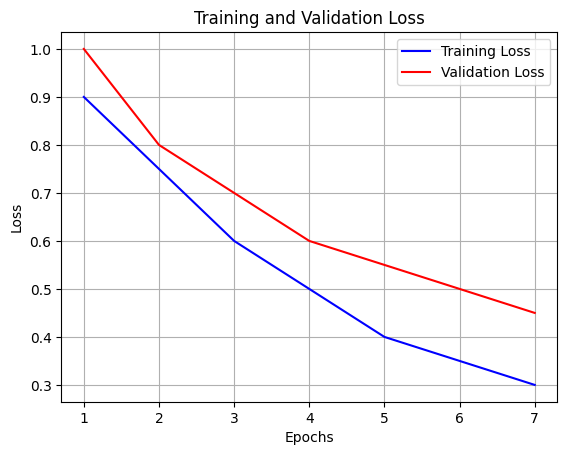

In [1]:
import matplotlib.pyplot as plt

def plot_learning_curve(train_loss_history, val_loss_history):
    """
    Plot the learning curve showing both training and validation losses.

    :param train_loss_history: List of training losses for each epoch
    :param val_loss_history: List of validation losses for each epoch
    """
    # Generate the x values (epochs)
    epochs = range(1, len(train_loss_history) + 1)
    
    # Plot training and validation loss
    plt.plot(epochs, train_loss_history, label='Training Loss', color='blue')
    plt.plot(epochs, val_loss_history, label='Validation Loss', color='red')
    
    # Add labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage with random loss data for illustration
train_loss_history = [0.9, 0.75, 0.6, 0.5, 0.4, 0.35, 0.3]  # Example training loss values
val_loss_history = [1.0, 0.8, 0.7, 0.6, 0.55, 0.5, 0.45]  # Example validation loss values

# Call the function to plot the learning curve
plot_learning_curve(train_loss_history, val_loss_history)


Epoch 1/20 - Train Loss: 0.8043 - Val Loss: 0.9065
Epoch 2/20 - Train Loss: 1.5797 - Val Loss: 0.9135
Epoch 3/20 - Train Loss: 1.7745 - Val Loss: 0.9164
Epoch 4/20 - Train Loss: 0.6911 - Val Loss: 0.9187
Epoch 5/20 - Train Loss: 0.3714 - Val Loss: 0.9254
Epoch 6/20 - Train Loss: 0.5429 - Val Loss: 0.9248
Epoch 7/20 - Train Loss: 0.4963 - Val Loss: 0.9255
Epoch 8/20 - Train Loss: 2.1491 - Val Loss: 0.9241
Epoch 9/20 - Train Loss: 1.3601 - Val Loss: 0.9275
Epoch 10/20 - Train Loss: 1.8961 - Val Loss: 0.9258
Epoch 11/20 - Train Loss: 0.6160 - Val Loss: 0.9259
Epoch 12/20 - Train Loss: 1.8838 - Val Loss: 0.9238
Epoch 13/20 - Train Loss: 0.8130 - Val Loss: 0.9271
Epoch 14/20 - Train Loss: 1.0373 - Val Loss: 0.9250
Epoch 15/20 - Train Loss: 0.3384 - Val Loss: 0.9265
Epoch 16/20 - Train Loss: 1.1038 - Val Loss: 0.9266
Epoch 17/20 - Train Loss: 1.7284 - Val Loss: 0.9246
Epoch 18/20 - Train Loss: 1.3189 - Val Loss: 0.9259
Epoch 19/20 - Train Loss: 0.5019 - Val Loss: 0.9267
Epoch 20/20 - Train L

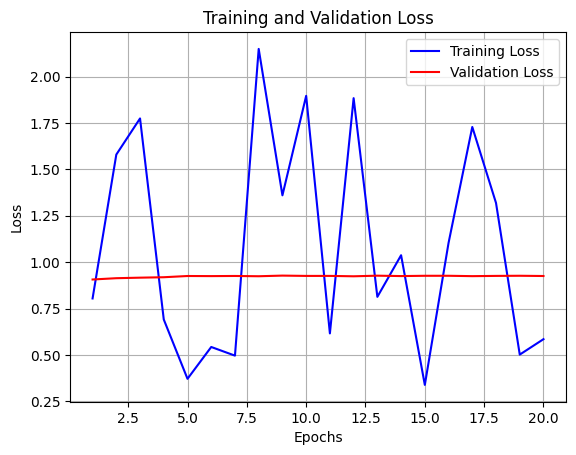

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example neural network class for forward pass and backward pass
class SimpleNeuralNetwork:
    def __init__(self, input_size, output_size):
        self.W = np.random.randn(input_size, output_size) * 0.01  # Weights initialization
        self.B = np.zeros(output_size)  # Bias initialization

    def forward(self, X):
        """ Forward pass through the network """
        return np.dot(X, self.W) + self.B

    def backward(self, X, dY):
        """ Backward pass to compute gradients """
        dW = np.dot(X.T, dY)
        dB = np.sum(dY, axis=0)
        return dW, dB

    def update(self, dW, dB, learning_rate):
        """ Update weights and biases using gradients """
        self.W -= learning_rate * dW
        self.B -= learning_rate * dB

# Loss function: Mean Squared Error (MSE) for simplicity
def compute_loss(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

# Generate dummy data (e.g., for regression)
X_train = np.random.randn(1000, 10)  # 1000 samples, 10 features
y_train = np.random.randn(1000, 1)   # 1000 labels
X_val = np.random.randn(200, 10)     # Validation data
y_val = np.random.randn(200, 1)      # Validation labels

# Mini-batch gradient descent implementation
def train_with_minibatch(model, X_train, y_train, X_val, y_val, batch_size, epochs, learning_rate):
    train_loss_history = []
    val_loss_history = []
    
    num_samples = X_train.shape[0]
    
    for epoch in range(epochs):
        # Shuffle the data at the beginning of each epoch
        indices = np.random.permutation(num_samples)
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]

        # Mini-batch training loop
        for i in range(0, num_samples, batch_size):
            # Get the current mini-batch
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]
            
            # Forward pass
            y_pred = model.forward(X_batch)
            
            # Compute the loss and backpropagate
            loss = compute_loss(y_batch, y_pred)
            dY = 2 * (y_pred - y_batch) / batch_size  # Derivative of MSE
            dW, dB = model.backward(X_batch, dY)
            
            # Update the model parameters (weights and biases)
            model.update(dW, dB, learning_rate)
        
        # Track training and validation loss after each epoch
        train_loss_history.append(loss)
        
        # Compute validation loss
        y_val_pred = model.forward(X_val)
        val_loss = compute_loss(y_val, y_val_pred)
        val_loss_history.append(val_loss)
        
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {loss:.4f} - Val Loss: {val_loss:.4f}")
    
    return train_loss_history, val_loss_history

# Parameters
input_size = 10
output_size = 1
batch_size = 32
epochs = 20
learning_rate = 0.01

# Initialize model
model = SimpleNeuralNetwork(input_size, output_size)

# Train the model with mini-batch gradient descent
train_loss_history, val_loss_history = train_with_minibatch(model, X_train, y_train, X_val, y_val, batch_size, epochs, learning_rate)

# Plot the learning curve
def plot_learning_curve(train_loss_history, val_loss_history):
    epochs = range(1, len(train_loss_history) + 1)
    plt.plot(epochs, train_loss_history, label='Training Loss', color='blue')
    plt.plot(epochs, val_loss_history, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plot function
plot_learning_curve(train_loss_history, val_loss_history)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 23s 2us/step


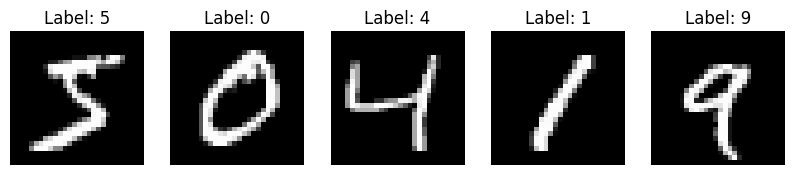

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Function to display one or more MNIST images
def display_mnist_images(images, labels, num_images=5):
    """ Display a set of MNIST images with their labels """
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')  # Display the image in grayscale
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')  # Hide the axis
    
    plt.show()

# Display first 5 images from the training set
display_mnist_images(train_images, train_labels, num_images=5)


In [4]:
class SGD:
    def __init__(self, learning_rate=0.01):
        """
        Initializes the SGD optimizer.

        :param learning_rate: The learning rate for parameter updates
        """
        self.learning_rate = learning_rate

    def update(self, model):
        """
        Updates the model's weights and biases using the gradients computed during backpropagation.
        
        :param model: The model whose parameters will be updated (e.g., weights and biases)
        """
        # Update weights
        model.W -= self.learning_rate * model.dW
        
        # Update biases
        model.B -= self.learning_rate * model.dB
        
        # If you want to add momentum or other optimizers, you can modify this method.
        # Example: Add momentum by storing previous updates and applying them next.



In [5]:
# Assume a model class that has attributes W, B, dW, dB, etc.
class SimpleNeuralNetwork:
    def __init__(self, input_size, output_size):
        self.W = np.random.randn(input_size, output_size) * 0.01  # Weights initialization
        self.B = np.zeros(output_size)  # Bias initialization
        self.dW = None  # Gradient of the weights (to be computed during backpropagation)
        self.dB = None  # Gradient of the biases (to be computed during backpropagation)

    def forward(self, X):
        """ Forward pass through the network """
        return np.dot(X, self.W) + self.B

    def backward(self, X, y, y_pred):
        """ Backward pass to compute gradients """
        # Mean Squared Error (MSE) loss derivative w.r.t weights and biases
        dY = 2 * (y_pred - y) / X.shape[0]
        self.dW = np.dot(X.T, dY)
        self.dB = np.sum(dY, axis=0)
        
    def update(self, optimizer):
        """ Update weights and biases using an optimizer """
        optimizer.update(self)

# Create the model
input_size = 10
output_size = 1
model = SimpleNeuralNetwork(input_size, output_size)

# Create an SGD optimizer
optimizer = SGD(learning_rate=0.01)

# Example dummy training data
X_train = np.random.randn(100, input_size)
y_train = np.random.randn(100, output_size)

# Training loop
for epoch in range(10):  # 10 epochs for example
    # Forward pass
    y_pred = model.forward(X_train)
    
    # Compute the loss (for example, using MSE)
    loss = np.mean((y_pred - y_train) ** 2)
    
    # Backward pass (compute gradients)
    model.backward(X_train, y_train, y_pred)
    
    # Update weights using the SGD optimizer
    model.update(optimizer)
    
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}")


Epoch 1, Loss: 0.9190
Epoch 2, Loss: 0.9156
Epoch 3, Loss: 0.9124
Epoch 4, Loss: 0.9094
Epoch 5, Loss: 0.9064
Epoch 6, Loss: 0.9036
Epoch 7, Loss: 0.9008
Epoch 8, Loss: 0.8982
Epoch 9, Loss: 0.8957
Epoch 10, Loss: 0.8933


In [6]:
class SGDWithMomentum(SGD):
    def __init__(self, learning_rate=0.01, momentum=0.9):
        super().__init__(learning_rate)
        self.momentum = momentum
        self.vW = 0  # Initialize momentum for weights
        self.vB = 0  # Initialize momentum for biases

    def update(self, model):
        self.vW = self.momentum * self.vW + (1 - self.momentum) * model.dW
        self.vB = self.momentum * self.vB + (1 - self.momentum) * model.dB

        # Update weights and biases with momentum
        model.W -= self.learning_rate * self.vW
        model.B -= self.learning_rate * self.vB
